# PART 2 :  SARSA Implementation by minazmeh and nagasita

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

Initial State:


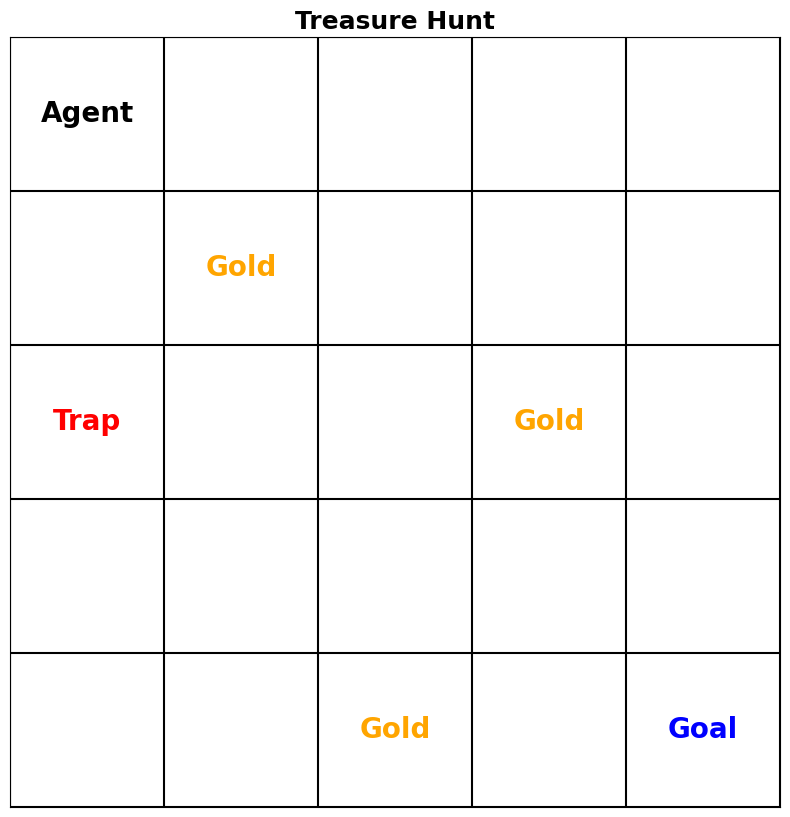

In [2]:
class TreasureHuntEnv:
    def __init__(self):
        self.action_space = ['Up', 'Down', 'Left', 'Right']
        self.state_space = [(x, y) for x in range(5) for y in range(5)]
        self.rewards = {
            (1, 1): 1,
            (4, 2): 3,
            (2, 3): 1,
            (2, 0): -1,
            (4, 4): 50 
        }
        self.current_state = (0, 0)

    def step(self, action):
        x, y = self.current_state
        if action == 'Up':
            x = max(0, x - 1)
        elif action == 'Down':
            x = min(4, x + 1)
        elif action == 'Left':
            y = max(0, y - 1)
        elif action == 'Right':
            y = min(4, y + 1)

        self.current_state = (x, y)
        reward = self.rewards.get(self.current_state, 0) - 1
        done = self.current_state == (4, 4)
        return self.current_state, reward, done

    def reset(self):
        self.current_state = (0, 0)
        return self.current_state
    
    def render(self):
        grid = np.zeros((5, 5)) 
        x, y = self.current_state 

        plt.figure(figsize=(10, 10))  
        for i in range(5):
            for j in range(5):
                if (i, j) == (4, 4):  
                    if (i, j) == self.current_state:
                        continue
                    plt.text(j + 0.5, 4 - i + 0.5, "Goal", ha='center', va='center',
                             color="blue", fontsize=20, fontweight='bold')
                    
                elif (i, j) in self.rewards:
                    if (i, j) == self.current_state: 
                        continue
                    if self.rewards[(i, j)] > 0:
                        plt.text(j + 0.5, 4 - i + 0.5, "Gold", ha='center', va='center',
                                 color="orange", fontsize=20, fontweight='bold')
                    elif self.rewards[(i, j)] < 0:
                        plt.text(j + 0.5, 4 - i + 0.5, "Trap", ha='center', va='center',
                                 color="red", fontsize=20, fontweight='bold')

        if self.current_state in self.rewards:
            if self.rewards[self.current_state] == 50:  
                agent_color = "blue"
                cell_color = "black"  
            elif self.rewards[self.current_state] > 0:  
                agent_color = "orange"
                cell_color = "black"  
            elif self.rewards[self.current_state] < 0:  
                agent_color = "red"
                cell_color = "black"
        else:
            agent_color = "black"  
            cell_color = None
        if cell_color:
            plt.gca().add_patch(plt.Rectangle((y, 4 - x), 1, 1, color=cell_color))

        plt.text(y + 0.5, 4 - x + 0.5, "Agent", ha='center', va='center',
                 color=agent_color, fontsize=20, fontweight='bold')

        for i in range(6):
            plt.axhline(i, color='black', linewidth=1.5)
            plt.axvline(i, color='black', linewidth=1.5)

        plt.xlim(0, 5)
        plt.ylim(0, 5)

        plt.gca().set_aspect('equal', adjustable='box') 
        plt.gca().set_xticks([]) 
        plt.gca().set_yticks([])
        plt.title("Treasure Hunt", fontsize=18, fontweight='bold')
        plt.show()




env = TreasureHuntEnv()
state = env.reset()
print("Initial State:")
env.render()



Step 1:
Action: Up
Next State: (0, 0)
Reward: -1


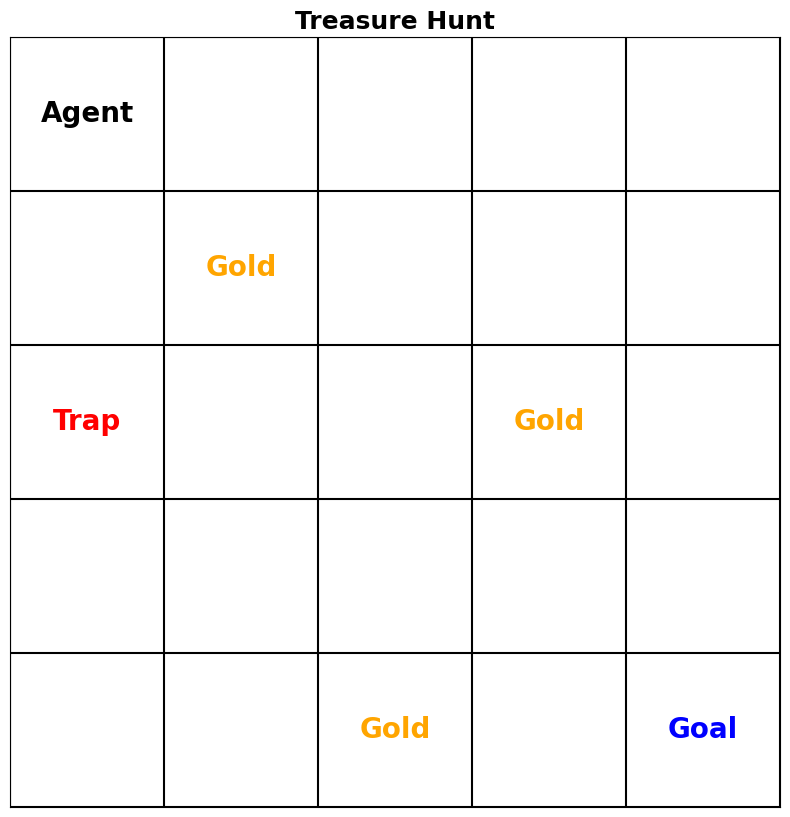

Step 2:
Action: Up
Next State: (0, 0)
Reward: -1


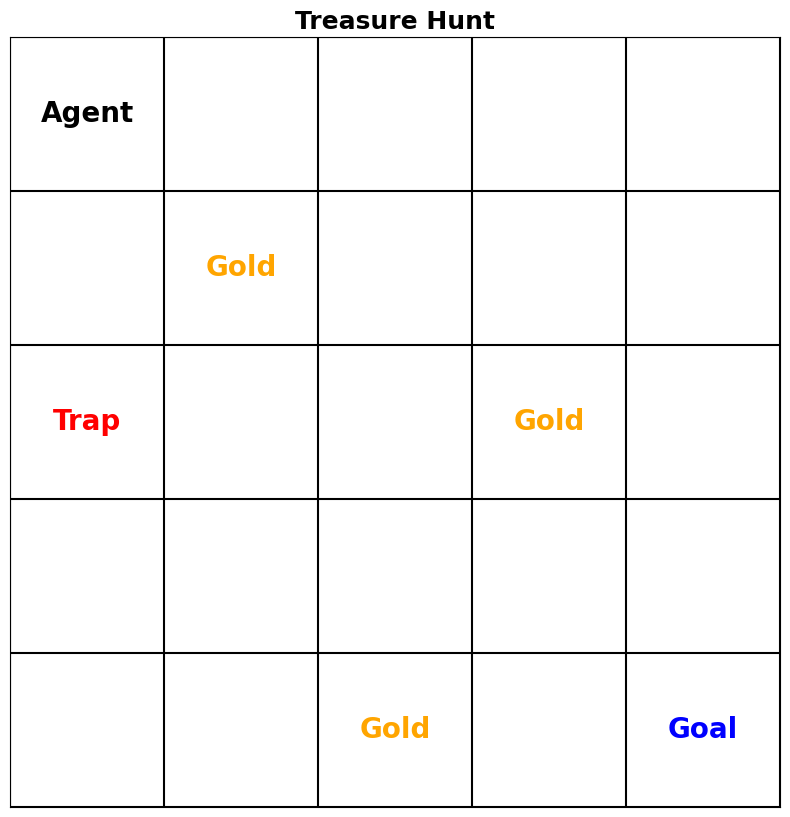

Step 3:
Action: Down
Next State: (1, 0)
Reward: -1


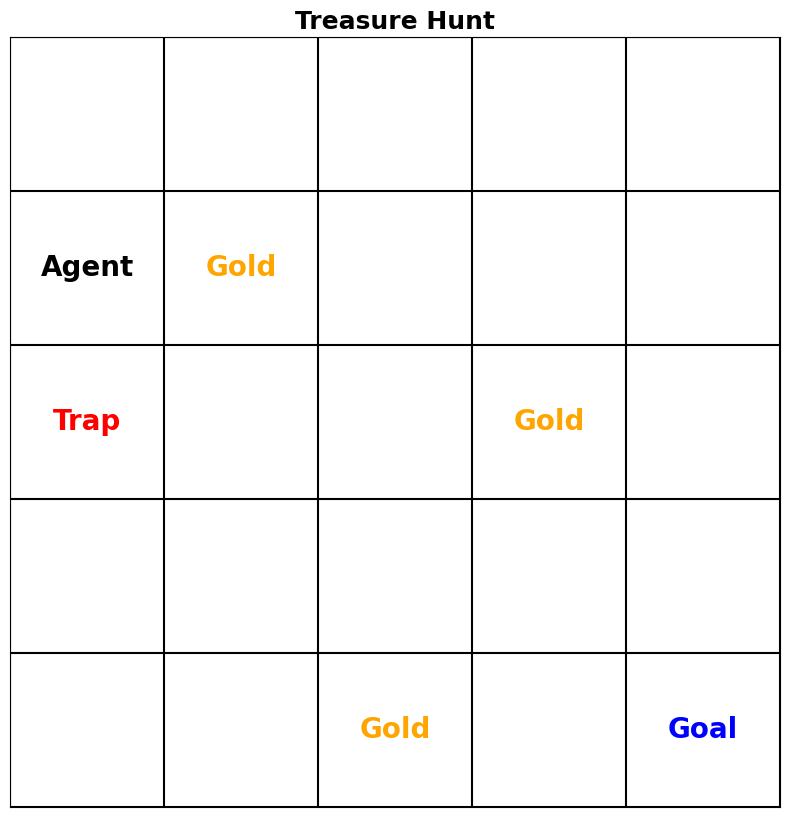

Step 4:
Action: Left
Next State: (1, 0)
Reward: -1


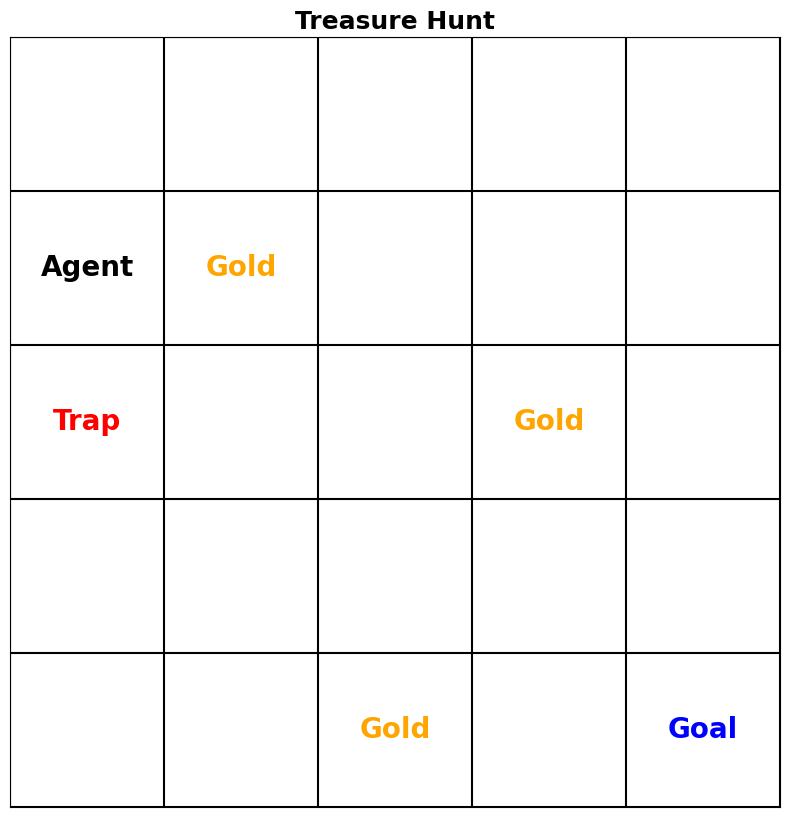

Step 5:
Action: Down
Next State: (2, 0)
Reward: -2


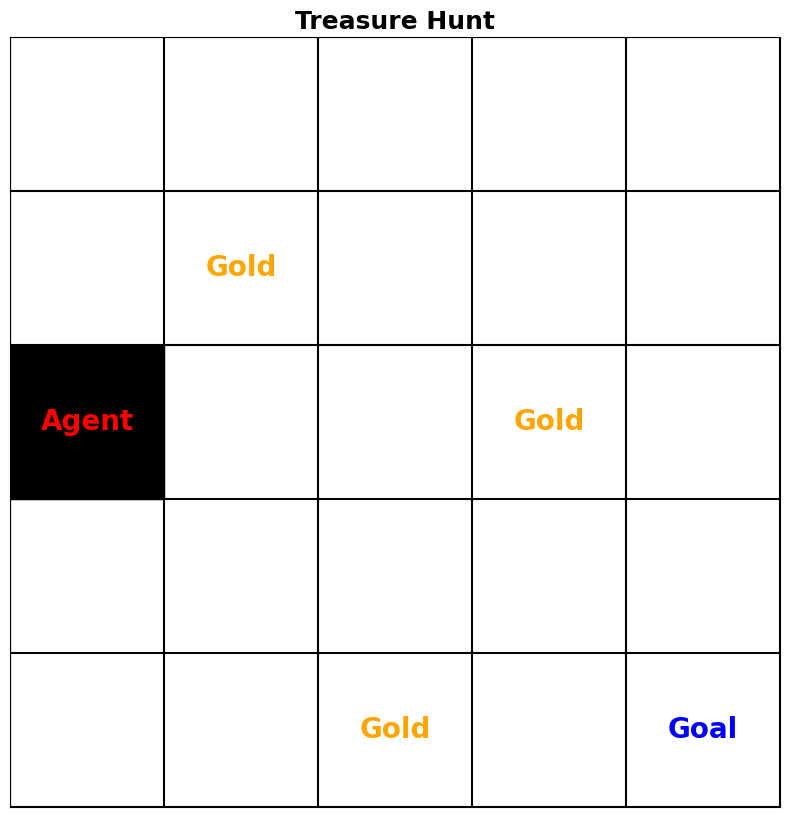

Step 6:
Action: Left
Next State: (2, 0)
Reward: -2


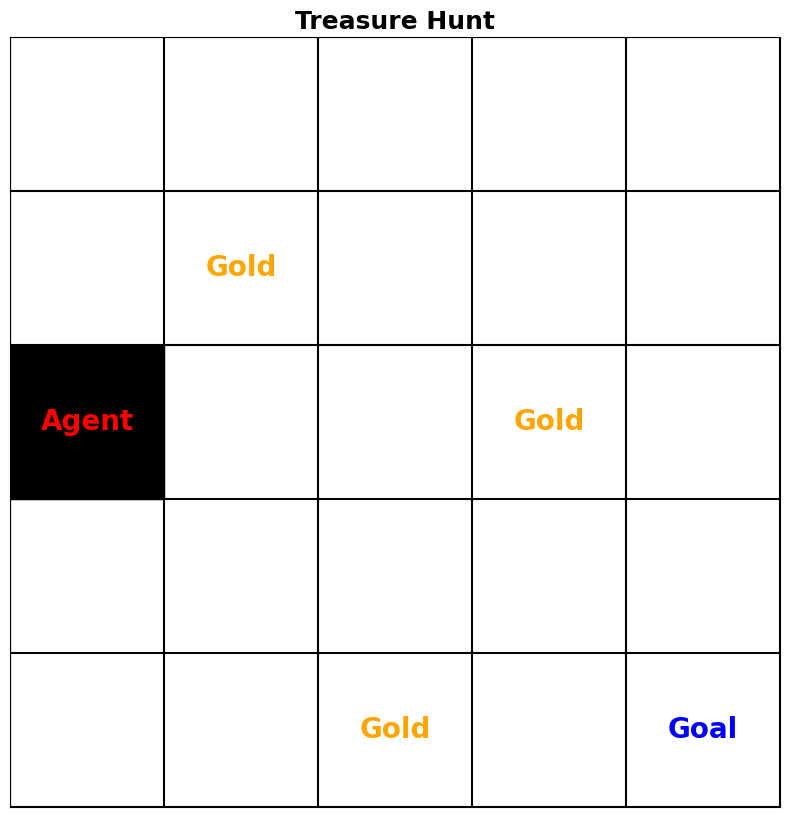

Step 7:
Action: Right
Next State: (2, 1)
Reward: -1


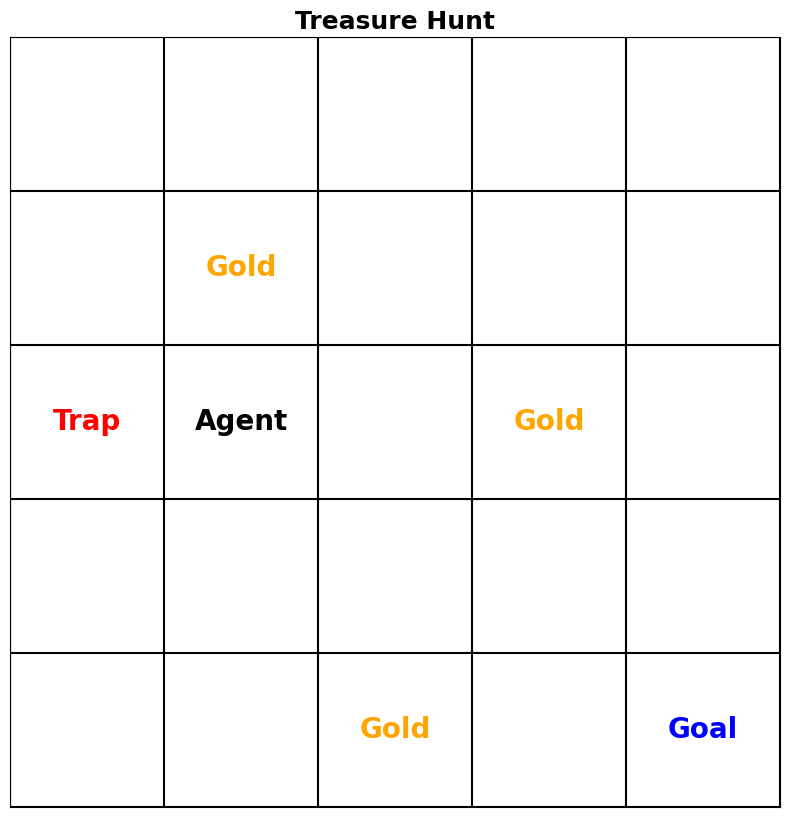

Step 8:
Action: Right
Next State: (2, 2)
Reward: -1


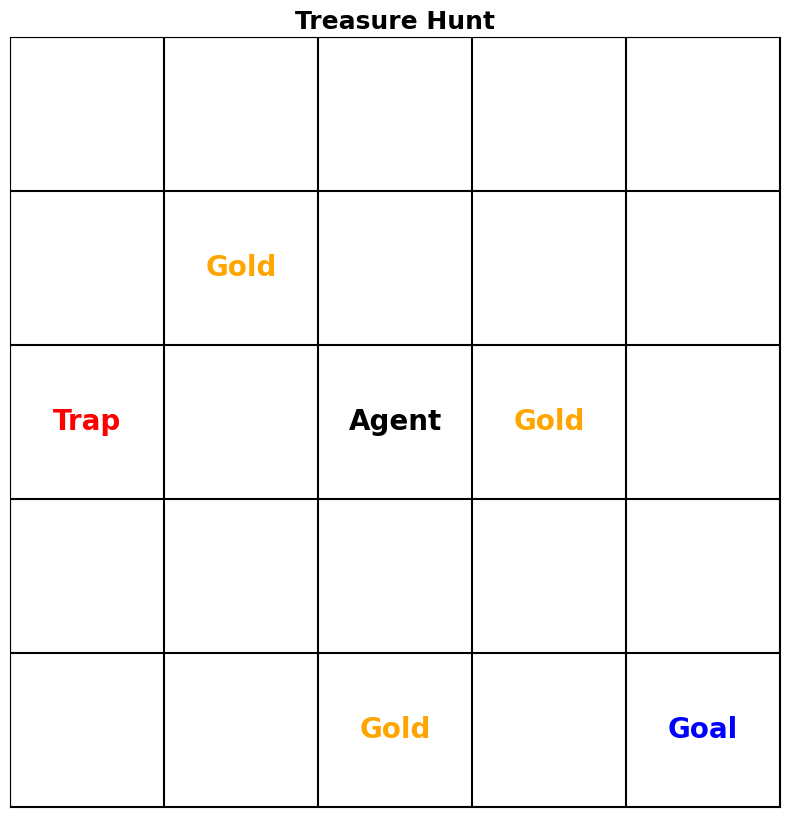

Step 9:
Action: Up
Next State: (1, 2)
Reward: -1


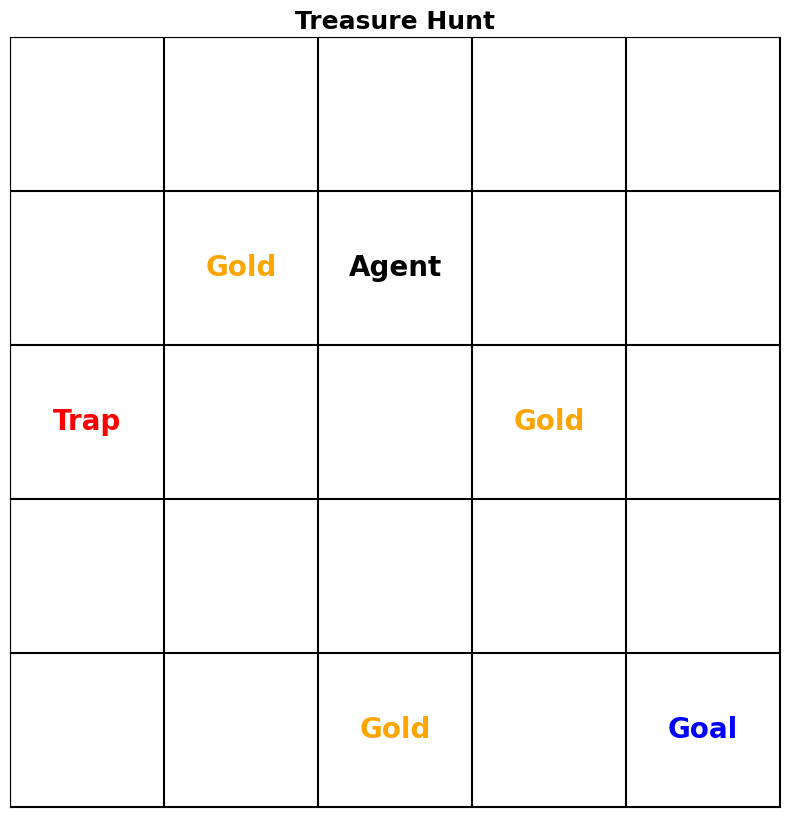

Step 10:
Action: Down
Next State: (2, 2)
Reward: -1


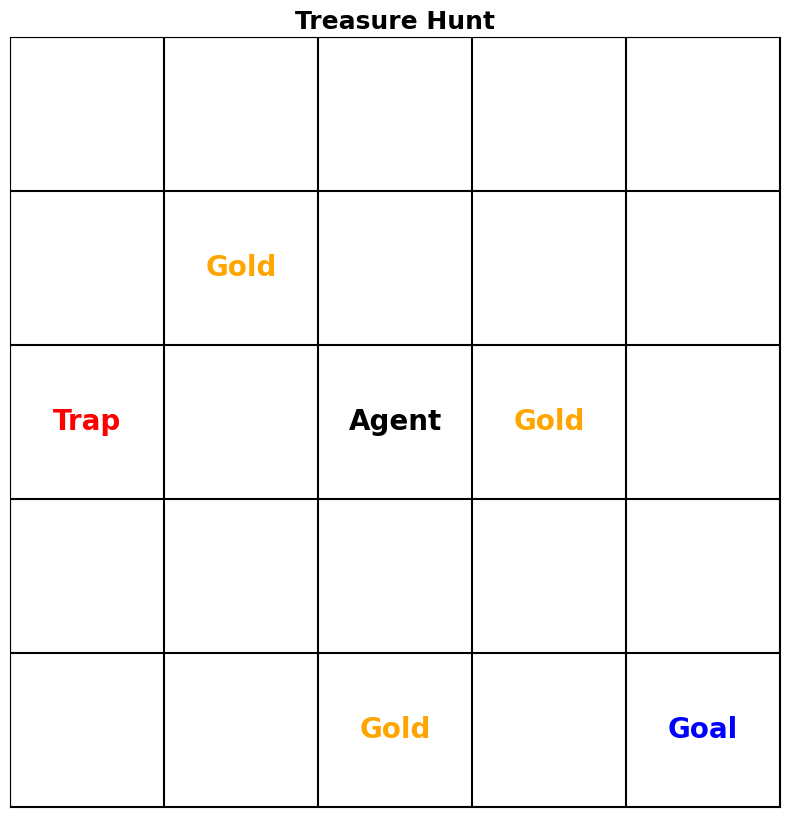

In [3]:
for t in range(10):
    action = random.choice(env.action_space)
    next_state, reward, done = env.step(action)
    print(f"Step {t+1}:")
    print(f"Action: {action}")
    print(f"Next State: {next_state}")
    print(f"Reward: {reward}")
    env.render()
    if done:
        print("Reached the goal!")
        break

In [4]:
class SARSAAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99,min_epsilon=0.01):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.Q = {state: {action: 0 for action in env.action_space} for state in env.state_space}
        print("Initial Q-values:")
        for state in self.Q:
            print(f"State {state}: {self.Q[state]}")
    def epsilon_greedy_policy(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.env.action_space)
        else:
            return max(self.Q[state], key=self.Q[state].get)

    def train(self, episodes):
        rewards_per_episode = []
        epsilon_values = []

        for episode in range(episodes):
            state = self.env.reset()
            action = self.epsilon_greedy_policy(state)
            total_reward = 0

            while True:
                next_state, reward, done = self.env.step(action)
                next_action = self.epsilon_greedy_policy(next_state)

                self.Q[state][action] += self.alpha * (
                    reward + self.gamma * self.Q[next_state][next_action] - self.Q[state][action]
                )

                total_reward += reward
                state, action = next_state, next_action

                if done:
                    break

            rewards_per_episode.append(total_reward)
            epsilon_values.append(self.epsilon)
            self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

        return rewards_per_episode, epsilon_values

    def evaluate(self, episodes, max_steps=100):
        print('Start evaluation')
        rewards = []
        comments = []

        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            success = False
            steps = 0

            while steps < max_steps:
                steps += 1
                action = max(self.Q[state], key=self.Q[state].get)
                next_state, reward, done = self.env.step(action)
                total_reward += reward
                state = next_state

                if done:
                    success = True
                    break

            rewards.append(total_reward)
            if success:
                comments.append(f"Episode {episode + 1}: SUCCESS - Goal reached in {steps} steps with total reward {total_reward}.")
            else:
                comments.append(f"Episode {episode + 1}: FAIL - Goal not reached in {steps} steps (max steps reached).")

        for comment in comments:
            print(comment)

        return rewards, comments

env = TreasureHuntEnv()
agent = SARSAAgent(env, alpha=0.8, gamma=0.7, epsilon=1, epsilon_decay=0.1,min_epsilon=0.2)

episodes = 1000
rewards_per_episode, epsilon_values = agent.train(episodes)

Initial Q-values:
State (0, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (0, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (0, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (0, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (0, 4): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (1, 4): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 2): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 3): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (2, 4): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (3, 0): {'Up': 0, 'Down': 0, 'Left': 0, 'Right': 0}
State (3, 1): {'Up': 0, 'Down': 0, 'Left': 0, 'Right':

In [5]:
evaluation_episodes = 40
evaluation_rewards, evaluation_comments = agent.evaluate(evaluation_episodes, max_steps=1000)

Start evaluation
Episode 1: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 2: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 3: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 4: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 5: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 6: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 7: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 8: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 9: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 10: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 11: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 12: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 13: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 14: SUCCESS - Goal reached in 8 steps with total reward 46.
Episode 15: SUCCESS - Goal reached in 8 

Trained Q-table:
(0, 0): {'Up': -0.6056509163572974, 'Down': 0.1216126798420204, 'Left': -0.7965647610474949, 'Right': 0.5979588683789872}
(0, 1): {'Up': -0.6919164389421613, 'Down': 0.9131185760896967, 'Left': -1.3770133577594716, 'Right': 0.5884843951446976}
(0, 2): {'Up': -1.5155685892688169, 'Down': -0.16018514110072957, 'Left': -0.17811097644721752, 'Right': 0.08016022518511878}
(0, 3): {'Up': -0.08108507666945197, 'Down': 8.070419122301018, 'Left': -0.7469379445367945, 'Right': -0.954085681063193}
(0, 4): {'Up': -1.9010031124236377, 'Down': -1.7397063885206474, 'Left': 4.9754780373118495, 'Right': -2.183958528}
(1, 0): {'Up': -0.891323644026135, 'Down': -1.1521553737699506, 'Left': -1.9412531035236933, 'Right': 1.3640276286099366}
(1, 1): {'Up': -0.9601868622753167, 'Down': 3.5352922433418064, 'Left': -1.3864336356939744, 'Right': -0.24750717914203868}
(1, 2): {'Up': -1.2586832931631262, 'Down': 6.86868997930161, 'Left': 1.2759468238148304, 'Right': 1.373843294554101}
(1, 3): {'U

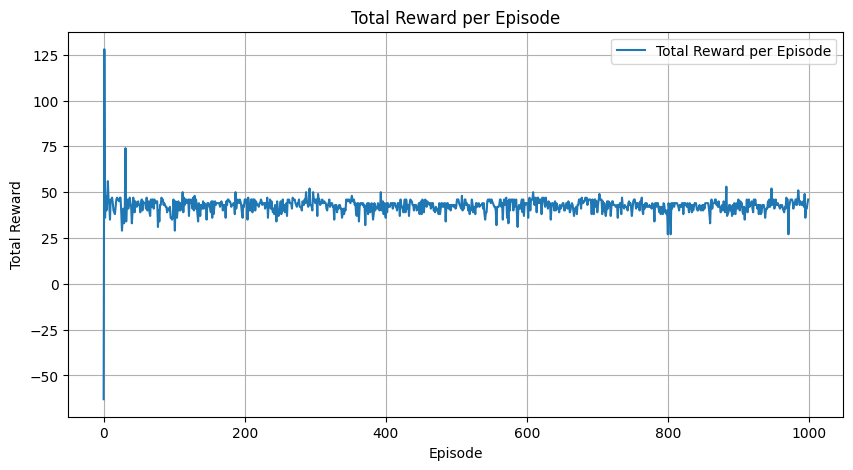

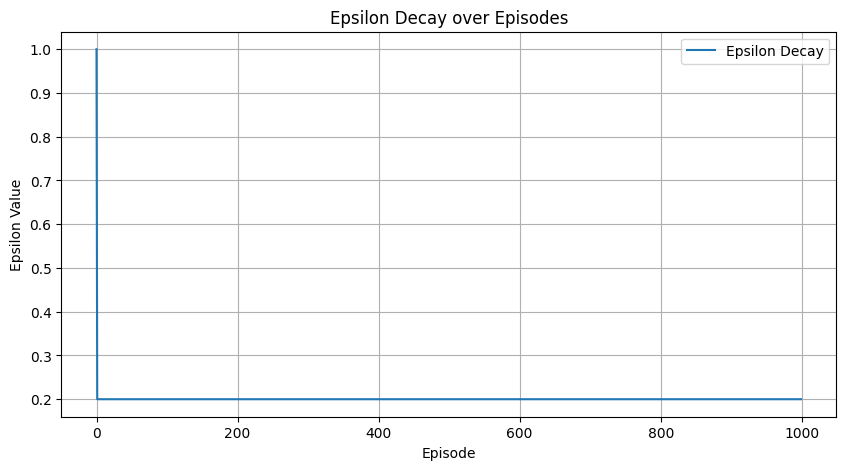

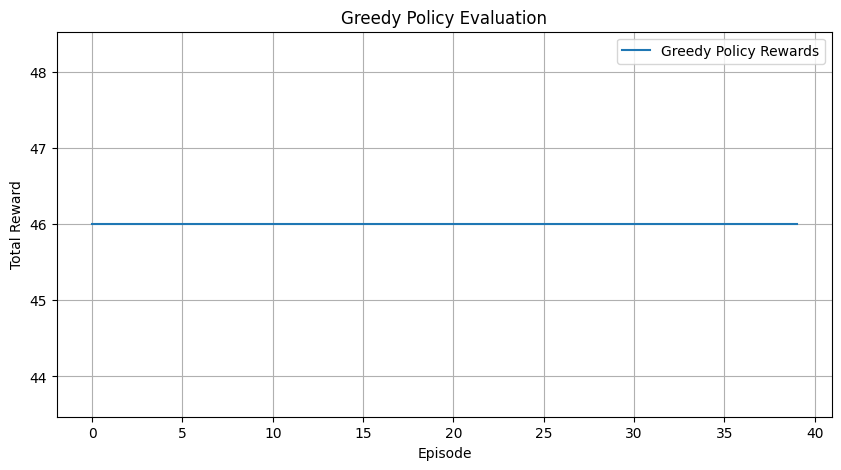

In [6]:
print("Trained Q-table:")
for state, actions in agent.Q.items():
    print(f"{state}: {actions}")

plt.figure(figsize=(10, 5))
plt.plot(rewards_per_episode, label="Total Reward per Episode")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epsilon_values, label="Epsilon Decay")
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay over Episodes')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(evaluation_rewards, label="Greedy Policy Rewards")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Greedy Policy Evaluation')
plt.legend()
plt.grid()
plt.show()

# Refrences: 

https://www.restack.io/p/reinforcement-learning-answer-gridworld-example-python-cat-ai

https://ubuffalo-my.sharepoint.com/personal/avereshc_buffalo_edu/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Favereshc%5Fbuffalo%5Fedu%2FDocuments%2F2024%5FFall%5FRL%2F%5Fpublic%2FCourse%20Materials%2FRL%20Environment%20Demo

https://www.supplychaindataanalytics.com/visualizing-2d-grids-and-arrays-using-matplotlib-in-python/

https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

https://www.geeksforgeeks.org/matplotlib-pyplot-gca-in-python/
https://www.geeksforgeeks.org/sarsa-reinforcement-learning/

https://www.datacamp.com/tutorial/sarsa-reinforcement-learning-algorithm-in-python